<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Example-of-per-step-cost" data-toc-modified-id="Example-of-per-step-cost-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Example of per-step cost</a></span></li><li><span><a href="#Cost-vs-qubits-size" data-toc-modified-id="Cost-vs-qubits-size-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Cost vs qubits size</a></span></li><li><span><a href="#Cost-with-respect-to-depth" data-toc-modified-id="Cost-with-respect-to-depth-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Cost with respect to depth</a></span></li></ul></li><li><span><a href="#Finding-biggest-tacklable-task" data-toc-modified-id="Finding-biggest-tacklable-task-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Finding biggest tacklable task</a></span><ul class="toc-item"><li><span><a href="#Full-ordering" data-toc-modified-id="Full-ordering-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Full ordering</a></span><ul class="toc-item"><li><span><a href="#Naive-(degree-based-local)-peo" data-toc-modified-id="Naive-(degree-based-local)-peo-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Naive (degree-based local) peo</a></span></li><li><span><a href="#QuickBB-peo" data-toc-modified-id="QuickBB-peo-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>QuickBB peo</a></span></li><li><span><a href="#Another-implementation-of-naive-peo" data-toc-modified-id="Another-implementation-of-naive-peo-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Another implementation of naive peo</a></span></li></ul></li></ul></li><li><span><a href="#Parallelize-after-critical-point" data-toc-modified-id="Parallelize-after-critical-point-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Parallelize after critical point</a></span><ul class="toc-item"><li><span><a href="#First-chopping" data-toc-modified-id="First-chopping-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>First chopping</a></span><ul class="toc-item"><li><span><a href="#Draw-chopped-graph" data-toc-modified-id="Draw-chopped-graph-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Draw chopped graph</a></span></li><li><span><a href="#Draw-chopped--parallelised-graph" data-toc-modified-id="Draw-chopped--parallelised-graph-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Draw chopped  parallelised graph</a></span></li><li><span><a href="#Late-paralelisaton-with-simple-reorder" data-toc-modified-id="Late-paralelisaton-with-simple-reorder-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Late paralelisaton with simple reorder</a></span><ul class="toc-item"><li><span><a href="#Full-chopped-cost" data-toc-modified-id="Full-chopped-cost-2.1.3.1"><span class="toc-item-num">2.1.3.1&nbsp;&nbsp;</span>Full chopped cost</a></span></li><li><span><a href="#Parallelised-chopped-cost" data-toc-modified-id="Parallelised-chopped-cost-2.1.3.2"><span class="toc-item-num">2.1.3.2&nbsp;&nbsp;</span>Parallelised chopped cost</a></span></li></ul></li><li><span><a href="#with-QuickBB-reorder" data-toc-modified-id="with-QuickBB-reorder-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>with QuickBB reorder</a></span><ul class="toc-item"><li><span><a href="#Full-chopped-cost" data-toc-modified-id="Full-chopped-cost-2.1.4.1"><span class="toc-item-num">2.1.4.1&nbsp;&nbsp;</span>Full chopped cost</a></span></li><li><span><a href="#Parallelized-chopped-cost" data-toc-modified-id="Parallelized-chopped-cost-2.1.4.2"><span class="toc-item-num">2.1.4.2&nbsp;&nbsp;</span>Parallelized chopped cost</a></span></li></ul></li></ul></li><li><span><a href="#Second-chopping" data-toc-modified-id="Second-chopping-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Second chopping</a></span><ul class="toc-item"><li><span><a href="#Draw-chopped--parallelised-graph" data-toc-modified-id="Draw-chopped--parallelised-graph-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Draw chopped  parallelised graph</a></span></li><li><span><a href="#with-naive-reorder" data-toc-modified-id="with-naive-reorder-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>with naive reorder</a></span></li><li><span><a href="#with-QuickBB-reorder" data-toc-modified-id="with-QuickBB-reorder-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>with QuickBB reorder</a></span></li></ul></li></ul></li><li><span><a href="#Trying-different-naive-orderings" data-toc-modified-id="Trying-different-naive-orderings-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Trying different naive orderings</a></span></li><li><span><a href="#Analyse-chopping" data-toc-modified-id="Analyse-chopping-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analyse chopping</a></span></li><li><span><a href="#Profiling-actual-simulation" data-toc-modified-id="Profiling-actual-simulation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Profiling actual simulation</a></span></li></ul></div>

In [1]:
import numpy as np
import networkx as nx
from loguru import logger as log
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import copy
import sys
sys.path.append('..')
sns.set_style('whitegrid')
import qtree 
import utils
import utils_qaoa as qaoa
import utils_mproc as mputils

%load_ext autoreload
%autoreload 2

ModuleNotFoundError("No module named 'tensorflow'")


## Example of per-step cost

In [35]:
mems, flops, nghs, N = qaoa.get_cost_of_task(58, seed=42, type='randomreg', degree=3)

KeyboardInterrupt: 

In [ ]:
fig = plt.figure(figsize=(6,4))
colors = [plt.cm.gnuplot2(x) for x in np.linspace(.8,.2,2)]

ax = plt.gca()
utils.plot_cost(mems, flops)
plt.xlabel('Elimination step')
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
[l.set_color(c) for l, c in zip(ax.get_lines(),colors)]
plt.legend(loc='lower left')
plt.ylabel('Step cost')

inset = fig.add_axes([.2, .5, .38, .36])
#plt.xlabel('Elimination step')
L = len(nghs)
c = 102
plt.yscale('log')
inset.plot(range(L-c, L), mems[-c:], color=colors[0])
inset.plot(range(L-c, L), flops[-c:], color=colors[1])
plt.grid(None)
ax2 = plt.gca().twinx()
ax2.plot(range(L-c, L), nghs[-c:], color='red', label='Number of neighbours')
#plt.yscale('log')
plt.grid(None)
plt.legend(loc='lower left')
plt.ylim(0,70)
plt.savefig('figures/contraction_cost_58_42d3.pdf')

In [ ]:
print(np.argmax(nghs), np.argmax(flops))
print(len(nghs), len(mems))
print(nghs[1], mems[5])

In [ ]:
def neigh_plot(nghs):
    plt.plot(nghs)
    nghs = np.array(nghs)
    dn = nghs[1:] - nghs[:-1]
    plt.plot(dn)
    
def get_chop_dn_drop(nghs):
    nghs = np.array(nghs)
    dn = nghs[1:] - nghs[:-1]
    neg_idx = [i for i, n in enumerate(dn) if n<0]
    pos_idx = [i for i, n in enumerate(dn) if n>0]
    drop_idx = neg_idx[0]
    pos_idx.reverse()
    before_drop = [i for i in pos_idx if i<drop_idx]
    return before_drop[0] - 1

    
neigh_plot(nghs)
get_chop_dn_drop(nghs)

## Cost vs qubits size 

In [ ]:
def log_log_scale():
    plt.yscale('log')
    plt.xscale('log')
    
def minorticks():
    plt.minorticks_on()
    plt.grid(which='minor', alpha=0.5, linestyle='-', axis='both')
    
def get_est(xs, vals):
    mem_est = np.polyfit(xs, np.log(vals), 2)
    mem_est = np.poly1d(mem_est)
    est = np.linspace(20,2e2, 100)
    mem_est = mem_est(est)
    return est,  np.exp(mem_est)

In [ ]:
sizes = np.arange(13,54,2)
results = [
   qaoa.get_cost_of_task(s, 1, type='randomreg',degree=3) for s in sizes
]

In [ ]:
def plot_theory(results, ns):
    
    sums = [(max(y[0]), sum(y[1])) for y in results]
    colors = [plt.cm.gnuplot2(x) for x in np.linspace(.8,.2,2)]
    memsums, flopsums = zip(*sums)

    est, mem_est = get_est(ns, memsums)
    est, flop_est = get_est(ns, flopsums)


    plt.plot(ns, flopsums, label='total FLOP', color=colors[1])
    plt.plot(ns, np.array(memsums), label='maximum Memory', color=colors[0])
    #plt.plot(est, mem_est, '--', label='mem log-log fit')
    #plt.plot(est, flop_est, '--', label='flop log-log fit')

    plt.xlabel('Number of qbits')
    plt.yscale('log')
    #plt.xscale('log')
    #plt.suptitle('QAOA one amplitude simulation cost', fontsize=14)
    #plt.title('MaxCut random regular graphs')
    plt.legend()
    plt.minorticks_on()
    plt.grid(which='minor', alpha=0.3, linestyle='-', axis='both')
    #ax = plt.gca().twinx()
    #plt.grid(None)
    #plt.plot(ns, nghssums, label='max ng', color='red')

In [65]:
import glob
import json

thread_folders = sorted(glob.glob('./contract_data/contr_profile_*thr'))
print(thread_folders)
thread_files = [sorted(glob.glob(folder+'/*.json')) for folder in thread_folders]
print(list(map(len, thread_files)))
thread_exps = [[json.load(open(f)) for f in files] for files in thread_files]
exp_results = [
    (max(e['proc_buck memory'])
    ,1e9*np.array(e['proc_buck time']).sum()
    )
    for exps in thread_exps
    for e in exps
]
print(len(exp_results))
sizes_exp = range(13,49,2)
threads_exp = [1, 16]
exp_results = np.array(exp_results).reshape(len(thread_exps), len(sizes_exp), 2)
print(exp_results.shape)

ns = list(zip(*results))[3]

['./contract_data/contr_profile_16thr', './contract_data/contr_profile_1thr']
[18, 18]
36
(2, 18, 2)


In [ ]:
#plot_theory(results, ns)
print(exp_results[0,:,1].shape)
plt.plot( exp_results[0,:,1])
plt.plot( exp_results[1,:,1])
result_rows = list(zip(*results))
plt.plot( list(map(sum, result_rows[1]))[:-2])

plt.yscale('log')
plt.savefig('figures/cost_vs_taskS_42d3.pdf')


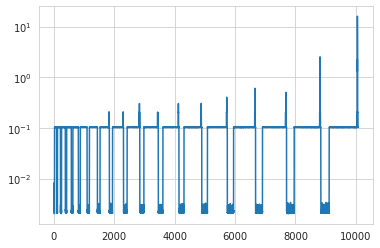

In [42]:
plt.plot(thread_exps[0][-1]['proc_buck time'])
plt.yscale('log')

In [66]:
total_data = json.load(open('./contract_data/contr_profile_total_13_49_2_42d3.json'))
sim_sum = total_data['Total_sim']

In [85]:
new_data = json.load(open('./contract_data/contr_profile_data47_42d3.json'))
single_threaded_time = new_data['proc_buck time']
single_threaded_mem = new_data['proc_buck memory']

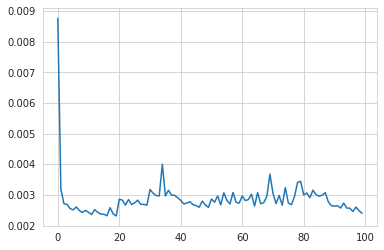

In [112]:
list(sizes_exp)
plt.plot(single_threaded_time[:100])
#plt.yscale('log')

No handles with labels found to put in legend.


2 14454
[7.31225872e+09 1.02439237e+10 1.31401970e+10 1.60871885e+10
 1.90075171e+10 2.34197588e+10 2.78129215e+10 3.23914726e+10
 3.84730556e+10 4.48279376e+10 5.05434315e+10 5.68319888e+10
 6.29880102e+10 7.05494864e+10 7.86340532e+10 8.60132837e+10
 9.90100219e+10 1.48003854e+11]
(2, 18)


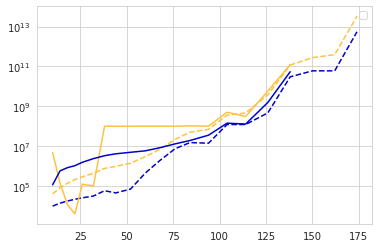

In [113]:
colors = [plt.cm.gnuplot2(x) for x in np.linspace(.8,.2,2)]
lens = [len(x) for x in result_rows[0]]
print(len(all_flops), sum(lens))

def unpack_flops(all_flops, map_f=sum):
    flops = []
    for i, s in enumerate(sizes_exp):
        prev = i
        end = i+1
        prev, end = [sum(lens[:x]) for x in (prev, end)]
        flops.append(all_flops[prev:end])
    sums_flops = [map_f(x) for x in flops]
    return sums_flops

sums_flops = [ unpack_flops(thread_exps[i][-1]['proc_buck time']) 
             for i in range(len(thread_exps)) ]

sums_flops = 1e9*np.array(sums_flops)
print(sums_flops[0])
print(sums_flops.shape)
sums_flops_theory = [sum(x) for x in result_rows[1]]
sums_mems_theory = [max(x) for x in result_rows[0]]
#for sf in sums_flops: plt.plot(sf)

plt.plot(ns, sums_flops_theory, '--', color=colors[0])
plt.plot(ns, 16*np.array(sums_mems_theory), '--', color=colors[1])

unp_flop = 1e9*np.array(unpack_flops(single_threaded_time, map_f=max))
unp_mem = unpack_flops(single_threaded_mem, map_f=max)

ns_exp = ns[:len(unp_mem)]

plt.plot(ns_exp, np.array(unp_flop) - .999*min(unp_flop), '-', color=colors[0])
plt.plot(ns_exp, np.array(unp_mem)- .999*min(unp_mem),'-', color=colors[1])
plt.legend()
plt.yscale('log')
    

## Cost with respect to depth


In [ ]:
psize = 4
Ssize = 9

costs_with_p = []
for p in range(1, 1+psize):
    for S in range(2, 2+Ssize):
        costs = get_cost_of_task(S, p)
        costs_with_p.append(costs)

In [ ]:

costs_with_p_p= [(sum(x[0]), sum(x[1]), max(x[2]), x[3]) for x in costs_with_p]
data = np.array(list(zip(*costs_with_p_p)))

data = data.reshape(4, psize, Ssize)
print(data.shape)

fig, axs = plt.subplots(1,3, figsize=(15, 5))

plt.sca(axs[0])
log_log_scale()
minorticks()
plt.title('memory')
for i in range(psize):
    plt.plot(data[-1,i], data[0,i])
    
plt.sca(axs[1])
log_log_scale()
minorticks()
plt.title('Flop')
for i in range(psize):
    plt.plot(data[-1,i], data[1,i])
    
plt.sca(axs[2])
log_log_scale()
minorticks()
plt.title('Neigh')
for i in range(psize):
    plt.plot(data[-1,i], data[2,i])

plt.suptitle('Cost dependence for different p')
plt.savefig('figures/cost_vs_p.png')

In [ ]:
psize = 3
Ssize = 3
p = 1

costs_with_pars = []
for pars in range(1, 1+psize):
    for S in range(25, 25+Ssize):
        costs = get_cost_of_splitted(S, p, pars)
        costs_with_pars.append(costs)

In [ ]:


costs_with_p_ = [(sum(x[0]), sum(x[1]), max(x[2]), x[3]) for x in costs_with_pars]
data = np.array(list(zip(*costs_with_p_)))

data = data.reshape(4, psize, Ssize)
print(data.shape)

fig, axs = plt.subplots(1,3, figsize=(15, 5))
colormap = plt.cm.gist_ncar
labels = [f'nodes: 2^{i}' for i in range(1, 1+psize)]
for ax in axs:
    ax.set_prop_cycle(plt.cycler('color', plt.cm.cool(np.linspace(0, 1, psize))))
    ax.set_xlabel('Qubit count')

plt.sca(axs[0])
log_log_scale()
minorticks()
plt.title('memory')
for i in range(psize):
    plt.plot(data[-1,i], data[0,i])
    
plt.sca(axs[1])
log_log_scale()
minorticks()
plt.title('Flop')
for i in range(psize):
    plt.plot(data[-1,i], data[1,i])
    
plt.sca(axs[2])
log_log_scale()
minorticks()
plt.title('Neigh')
for i in range(psize):
    plt.plot(data[-1,i], data[2,i])
plt.legend(labels)

plt.suptitle('Cost dependence for parallelised, rectangular task. p=1')
plt.savefig('figures/rect_cost_vs_nodes_p1.png')

In [ ]:

costs_with_p_ = [(sum(x[0]), sum(x[1]), max(x[2]), x[3]) for x in costs_with_pars]
data = np.array(list(zip(*costs_with_p_)))

data = data.reshape(4, psize, Ssize)
data = data.transpose(0,2,1)
print(data.shape)
processes = 2**(np.arange(1, 1+psize))
fig, axs = plt.subplots(1,3, figsize=(15, 5))
for ax in axs:
    ax.set_xlabel('Nodes')
    ax.set_prop_cycle(plt.cycler('color', plt.cm.spring(np.linspace(0, 1, psize))))

plt.sca(axs[0])
log_log_scale()
minorticks()
plt.title('memory')
for i in range(Ssize):
    plt.plot(processes, data[0,i])
    
plt.sca(axs[1])
log_log_scale()
minorticks()
plt.title('Flop')
for i in range(Ssize):
    plt.plot(processes, data[1,i])
    
plt.sca(axs[2])
log_log_scale()
minorticks()
plt.title('Neigh')
for i in range(Ssize):
    plt.plot(processes, data[2,i])

labels = [f'{int(i)} qubits' for i in data[-1,:, 0]]
plt.legend(labels)
plt.suptitle('Cost dependence for parallelised vars, different qubit counts, rectangular task. p=1')
plt.savefig('figures/rect_cost_vs_nodes_T_p1.png')

# Finding biggest tacklable task
## Full ordering

In [40]:
graph, N = qaoa.get_test_expr_graph(25, 1, type='randomreg', degree=3)

print(N)

38


### Naive (degree-based local) peo

In [41]:
%%time
peo, nghs = utils.get_locale_peo(graph, utils.n_neighbors)
graph_relabel, slice_dict = utils.reorder_graph(graph, peo)

CPU times: user 635 ms, sys: 3.09 ms, total: 638 ms
Wall time: 960 ms


100%|██████████| 342/342 [00:02<00:00, 117.94it/s]


2.32e-06
1.536e-05


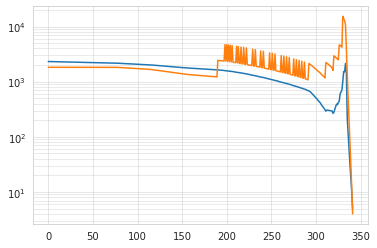

In [42]:
costs, flops = qtree.graph_model.cost_estimator(graph_relabel)
print(max(costs)/1e9)
print(max(flops)/1e9)
utils.plot_cost(costs, flops)

#nx.draw_kamada_kawai(graph, node_size=3)

In [ ]:
neigh_plot(nghs)

### QuickBB peo

QuickBB usually fails on big (>5k nodes) graphs

In [ ]:
%cd ..

In [ ]:
%%time
peoqbb, tw = qtree.graph_model.get_peo(graph)

In [ ]:
graph, slice_dict = utils.reorder_graph(graph, peoqbb)

costs, mems = qtree.graph_model.cost_estimator(graph)
print(max(mems)/1e8)
print(max(costs)/1e8)
utils.plot_cost(costs, mems)

### Another implementation of naive peo

In [ ]:
%%time
peon, nghs = utils.get_neighbours_peo(graph)
graph_relabel, slice_dict = utils.reorder_graph(graph, peon)

costs, mems = qtree.graph_model.cost_estimator(graph_relabel)
print(max(mems)/1e8)
print(max(costs)/1e8)
utils.plot_cost(costs, mems)

In [ ]:
peo, nghs = utils.get_locale_peo(graph, utils.edges_to_clique)
graph_relabel, slice_dict = utils.reorder_graph(graph, peo)

costs, mems = qtree.graph_model.cost_estimator(graph_relabel)
utils.plot_cost(costs, mems)

# Parallelize after critical point

## First chopping 

In [43]:
chop1 = 320
#get_chop_idxs(graph, peo, (costs, flops), nghs)

In [44]:
graph_full = copy.deepcopy(graph)
for n in peo[:chop1]:
    qtree.graph_model.eliminate_node(graph, n)
print('Nodes left:', graph.number_of_nodes())

Nodes left: 22


### Draw chopped graph

In [45]:
print(peo[4100:])
print(sorted(graph.degree, key=lambda x: x[1]))
print(sorted([ utils.edges_to_clique(graph, x[0]) for x in graph.degree]))

[]
[(83, 7), (103, 7), (107, 7), (119, 7), (127, 7), (129, 8), (93, 8), (99, 8), (109, 8), (139, 8), (143, 8), (91, 9), (137, 9), (123, 9), (133, 9), (141, 9), (145, 9), (131, 10), (147, 10), (149, 10), (121, 12), (117, 13)]
[15, 15, 15, 15, 15, 21, 21, 21, 21, 21, 21, 28, 28, 28, 28, 29, 29, 36, 36, 37, 56, 67]


In [46]:
nns_f = []
nns= []
for n in graph:
    nns.append(len(graph[n]))
for n in graph_full:
    nns_f.append(len(graph_full[n]))
print(sorted(nns))
print(sorted(nns_f))

[6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 10]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4

/usr/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


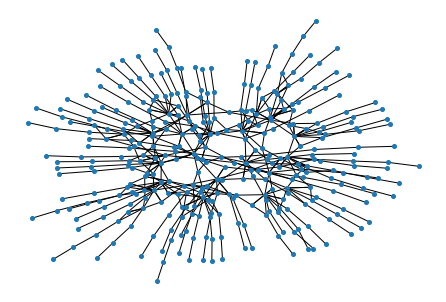

In [47]:
nx.draw_kamada_kawai(graph_full, node_size=16)

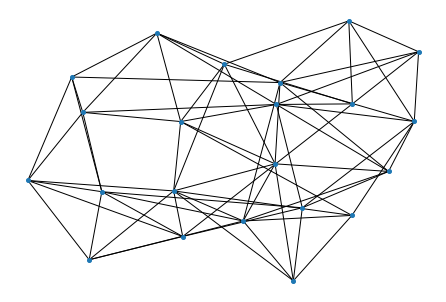

In [48]:
nx.draw_kamada_kawai(graph, node_size=16)

### Draw chopped  parallelised graph

### Late paralelisaton with simple reorder

#### Full chopped cost

In [ ]:
def _optimise_graph(graph):
    peo, nghs = utils.get_locale_peo(graph, utils.n_neighbors)
    graph, l = utils.reorder_graph(graph, peo)
    return graph, nghs

In [ ]:
graph_opt, nghs = _optimise_graph(graph)
mems, flops = qtree.graph_model.cost_estimator(graph_opt)
print(max(mems)/1e9)
print(max(flops)/1e9)
utils.plot_cost(mems, flops)

#### Parallelised chopped cost

In [ ]:
def print_costs(mems, flop):
    print(f'Memory max: {max(mems):.3E}, Flop sum: {sum(flop):.3E}')
    
parvars = np.arange(32)
costs = []
for pv  in parvars:
    PAR_VARS = pv
    par_vars, graph_split = qtree.graph_model.split_graph_by_metric(
        graph
        , n_var_parallel=PAR_VARS
    )
    graph_split_opt, nghs = _optimise_graph(graph_split)
    mems, flops = qtree.graph_model.cost_estimator(graph_split_opt)
    print('Parvars:', parvars)
    costs.append((max(mems), sum(flops)))
    print_costs(mems, flops)
utils.plot_cost

In [ ]:
x = list(zip(*costs))
memsmax, flopsum =x

fig, axs = plt.subplots(1,1,figsize=(10,4), sharey=True)
plt.xlabel('Parallel variables')
plt.plot(parvars[::2], memsmax[::2],'*-',  label='max mem')
plt.plot(parvars[::2], flopsum[::2],'*-',  label='sum flop')
plt.plot(parvars[1::2], memsmax[1::2],'.',  label='max mem odd')
plt.plot(parvars[1::2], flopsum[1::2], '.', label='sum flop odd')
plt.legend()
plt.yscale('log')
plt.suptitle('Random regular graph with degree 3')
plt.savefig('qaoa/figures/randomdeg3_parvars_even_odd_dots.png')

### with QuickBB reorder

#### Full chopped cost

In [ ]:
peoqbb, tw = qtree.graph_model.get_peo(graph)
graph_opt_relabel, nghs = utils.reorder_graph(graph, peoqbb)
mems, flops = qtree.graph_model.cost_estimator(graph_opt_relabel)

In [ ]:
print(max(mems)/1e9)
print(max(flops)/1e9)
utils.plot_cost(mems, flops)

#### Parallelized chopped cost

In [ ]:
peoqbb_split, tw = qtree.graph_model.get_peo(graph_split)

In [ ]:
graph_split_relabel, nghs = utils.reorder_graph(graph_split, peoqbb_split)
mems, flops = qtree.graph_model.cost_estimator(graph_split_relabel)
print(max(mems)/1e9)
print(max(flops)/1e9)
utils.plot_cost(mems, flops)

In [ ]:
peoqbb_split, tw = qtree.graph_model.get_peo(graph_split)

## Second chopping

In [ ]:
chop2 = 40

In [ ]:
for n in peo[chop1:chop1 + chop2]:
    qtree.graph_model.eliminate_node(graph, n)
print('Nodes left:', graph.number_of_nodes())

In [ ]:
print(peo[chop1 + chop2:])
print(sorted(graph.degree, key=lambda x: x[1]))
print(sorted([ utils.edges_to_clique(graph, x[0]) for x in graph.degree]))

In [ ]:
nx.draw_kamada_kawai(graph, node_size=16)

### Draw chopped  parallelised graph

In [ ]:
par_vars, graph_split = qtree.graph_model.split_graph_by_metric(graph, n_var_parallel=11)
nx.draw_kamada_kawai(graph_split, node_size=16)

### with naive reorder

In [ ]:
graph_opt, nghs = _optimise_graph(graph)
mems, flops = qtree.graph_model.cost_estimator(graph_opt)
print(max(mems)/1e9)
print(max(flops)/1e9)
utils.plot_cost(mems, flops)

In [ ]:
graph_split_opt, nghs = _optimise_graph(graph_split)
mems, flops = qtree.graph_model.cost_estimator(graph_split_opt)
print(max(mems)/1e9)
print(sum(flops)/1e12)
plt.subplot(121)
utils.plot_cost(mems, flops)
plt.subplot(122)
neigh_plot(nghs)

### with QuickBB reorder

In [ ]:
peoqbb, tw = qtree.graph_model.get_peo(graph)
graph_opt_relabel, _ = utils.reorder_graph(graph, peoqbb)
mems, flops = qtree.graph_model.cost_estimator(graph_opt_relabel)

In [ ]:
print(max(mems)/1e9)
print(sum(flops)/1e12)
utils.plot_cost(mems, flops)

In [ ]:
peoqbb_split, tw = qtree.graph_model.get_peo(graph_split)
print(tw)

In [ ]:
graph_split_relabel, _ = utils.reorder_graph(graph_split, peoqbb_split)
mems, flops = qtree.graph_model.cost_estimator(graph_split_relabel)
print(max(mems)/1e9)
print(sum(flops)/1e12)
plt.subplot(121)
utils.plot_cost(mems, flops)
plt.subplot(122)
n, nghs = utils.get_neighbours_path(graph_split_relabel)
neigh_plot(nghs)

In [ ]:
sg = graph.subgraph([1538] + list(graph.neighbors(1538)))
N = sg.number_of_nodes()
print(sg.number_of_edges(), 1/2*N*(N-1))
print(list(sg.selfloop_edges()))
edges = [e for e in graph.edges if all([e[-1]==0]+[x in sg.nodes for x in e[:2]])]
print(len(edges))
print(utils.edges_to_clique(graph, 1538))

nx.draw_shell(sg, with_labels=True)

# Trying different naive orderings 

In [ ]:
def cost_graph_peo(graph_old, peo):
    graph, _ = utils.reorder_graph(graph_old, peo) costs  = qtree.graph_model.cost_estimator(graph)
    return costs

In [ ]:
sizes = np.arange(21,32, 2)
exprs = [get_test_expr_graph(s, 1) for s in sizes]
qbit_cnts = [N for _, N in exprs]
exprs = [graph for graph, _ in exprs]

print('Qbit counts:', qbit_cnts)

peos_maxs = {
    'degree naive':[
        utils.get_locale_peo(graph, utils.n_neighbors) for graph in exprs
    ]
    ,'min-fill naive':[
        qtree.graph_model.get_upper_bound_peo_ints(graph) for graph in exprs
    ]
}

In [ ]:
peos = {k: [peo for peo, max in v] for k, v in peos_maxs.items()}
costs= {
    k:[cost_graph_peo(graph, peo) for graph, peo in zip(exprs, v)]
    for k, v in peos.items()
}

In [ ]:
mems = { k:[sum(mems) for mems, _ in v] 
        for k, v in costs.items() }
mems_max = { k:[np.max(mems) for mems, _ in v] 
        for k, v in costs.items() }

flops = { k:[sum(flops) for _, flops in v] 
        for k, v in costs.items() }
flops_max = { k:[max(flops) for _, flops in v] 
        for k, v in costs.items() }

for k in mems:
    plt.plot(qbit_cnts, mems[k], label=k)
    plt.plot(qbit_cnts, mems_max[k], '--', label=k+'max')

plt.yscale('log')
plt.xlabel('qbit count')
plt.title('Compare naive ordering methods')

plt.legend()
plt.savefig('degree_vs_minfill.pdf')

In [ ]:
import json
with open('costs_cache.json', 'w+') as f:
    json.dump(mems, f)

# Analyse chopping


In [ ]:
chop_pts = 3
def get_chop_idxs(graph, peo, cost, nghs):
    drop_idx = get_chop_dn_drop(nghs)
    min_idx = np.argmin(cost[0][:drop_idx])
    before_min = min_idx - (drop_idx-min_idx)
    on_plato = 2 * min_idx // 3
        
    return min_idx, drop_idx, drop_idx+5

def _cost_before_chop(idxs, cost):
    mems, floats = cost
    before_mem = [max(mems[:i]) for i in idxs]
    return before_mem




In [ ]:
def contract_by_peo(old_graph, peo):
    graph = copy.deepcopy(old_graph)
    for n in peo:
        qtree.graph_model.eliminate_node(graph, n)
    return graph

In [ ]:
sizes = [35, 40, 45]

tasks = [get_test_expr_graph(s, 1) for s in sizes]
graphs =     [g for g, _ in tasks]
qbit_sizes = [N for _, N in tasks]
peos_n = [utils.get_locale_peo(g, utils.n_neighbors) for g in graphs]
peos, nghs = zip(*peos_n)

In [ ]:

costs = [cost_graph_peo(g, p) for g, p in zip(graphs, peos)]

In [ ]:
tqdm._instances.clear()
chopped_g = [
    contract_by_peo(g, peo[:_idx]) 
    for g, peo, cost, ng in tqdm( zip(graphs, peos, costs, nghs) )
    for _idx in get_chop_idxs(g, peo, cost, ng)
]

costs_before_chop = [
    mem
    for g, peo, cost, ng in tqdm( zip(graphs, peos, costs, nghs) )
    for mem in _cost_before_chop(get_chop_idxs(g, peo, cost, ng), cost)
]

In [ ]:
print('contracted graphs', [g.number_of_nodes() for g in chopped_g])

print('costs before chop', costs_before_chop)

In [ ]:
par_vars = [0,1,2,5, 7, 12]

parallelized_g = [
    g
    for graph in chopped_g
    for parvar in par_vars
    for  _, g in [qtree.graph_model.split_graph_by_metric(graph, n_var_parallel=parvar)]
]

In [ ]:
print('parallelised graphs', [g.number_of_nodes() for g in parallelized_g])

In [ ]:
peos_par = [
    peo 
    for g in tqdm( parallelized_g )
    for peo, _ in [utils.get_locale_peo(g, utils.n_neighbors)]
]

In [ ]:
def get_qbb_peo(graph):
    try:
        peo, tw = qtree.graph_model.get_peo(graph)
        fail = False
    except:
        print('QBB fail, nodes count:', graph.number_of_nodes())
        peo, nghs = utils.get_locale_peo(graph, utils.n_neighbors)
        fail = True
    return peo, fail

In [ ]:
peos_par = [ get_qbb_peo(g) for g in tqdm( parallelized_g ) ]
peos_par, fails_qbb = zip(*peos_par)

In [ ]:
tqdm._instances.clear()

In [ ]:
costs_all = [cost_graph_peo(g, p) for g, p in 
           tqdm(
               list(
                   zip(
                       parallelized_g, peos_par
                   )
               )
           )]

In [ ]:
mems = [max(m) for m,_ in costs_all ]

In [ ]:
_data = np.array(mems).reshape(len(sizes), chop_pts, len(par_vars)) 

_data

In [ ]:
def trid_plot(x, y, labels, dimspec=(0,1,2)): 
    y = y.transpose(dimspec)
    plot_cnt = y.shape[0]
    line_cnt = y.shape[1]
    def _label_of(dim, idx):
        return labels[dim] + ' ' + str(x[dim][idx])
    
    fig, axs = plt.subplots(1, plot_cnt, sharey=True, figsize=(15,4))
    try:
        iter(axs)
    except TypeError:
        axs = [axs]
    for i, ax in enumerate(axs):
        plt.sca(ax)
        plt.title(_label_of(0, i))
        for j in range(line_cnt):
            plt.plot(x[2], y[i,j], label=_label_of(1, j))
            plt.xlabel(labels[2])
            plt.yscale('log')
            plt.legend()

In [ ]:
xs = [np.arange(chop_pts), sizes, par_vars]
trid_plot(xs, _data, ['Chop part', 'Task size', 'Par vars'],(1,0,2))
plt.suptitle('Parallelisation with chopping, naive peo')
plt.savefig('qaoa/figures/chop_analys_qbbpeo_35-38.pdf')

In [ ]:
#mems_naive = mems
mems_qxx35 = mems

In [ ]:
_chopcost = np.array(costs_before_chop).reshape(len(sizes), 5, 1)
trid_plot([' ', sizes, range(5)], _chopcost, ['Chop cost', 'Task size', 'Chop part'], (2,0,1))

In [ ]:
utils.plot_cost(*costs[-1])

In [ ]:
_cost_before_chop([600, 800, 905, 950],  costs[-1])


# Profiling actual simulation


In [ ]:
from pyrofiler import mem_util, timed, timing
from pyrofiler.callbacks import append_to

In [ ]:
profile = {}

@mem_util(description='mem', callback=append_to(profile))
@timed('time', callback=append_to(profile))
@log.catch()
def simulate_circ(circuit, n_qubits):
    buckets, data_dict, bra_vars, ket_vars = qtree.optimizer.circ2buckets(
        n_qubits, circuit)

    graph = qtree.graph_model.buckets2graph(
        buckets,
        ignore_variables=bra_vars+ket_vars)

    peo, nghs = utils.get_locale_peo(graph, utils.n_neighbors)
    peo = qtree.graph_model.indices_to_vars(peo, graph)
    
    # place bra and ket variables to beginning, so these variables
    # will be contracted first
    #peo, treewidth = qtree.graph_model.get_peo(graph)

    peo = ket_vars + bra_vars + peo
    perm_buckets, perm_dict = qtree.optimizer.reorder_buckets(buckets, peo)

    # extract bra and ket variables from variable list and sort according
    # to qubit order
    ket_vars = sorted([perm_dict[idx] for idx in ket_vars], key=str)
    bra_vars = sorted([perm_dict[idx] for idx in bra_vars], key=str)

    # Take the subtensor corresponding to the initial state
    initial_state = target_state = 0
    slice_dict = qtree.utils.slice_from_bits(initial_state, ket_vars)
    slice_dict.update(
        qtree.utils.slice_from_bits(target_state, bra_vars)
    )
    sliced_buckets = qtree.np_framework.get_sliced_np_buckets(
        perm_buckets, data_dict, slice_dict)
    
    with timing('time_raw', callback=append_to(profile)):
        result = qtree.optimizer.bucket_elimination(
            sliced_buckets, qtree.np_framework.process_bucket_np)
        

In [ ]:
for key in profile:
    profile[key] = []
    
profile['N'] = []
sizes = np.arange(5,27) 

for S in sizes[:]:
    qc, N = get_test_qaoa(S)
    profile['N'].append(N)
    print(N,'qubits')
    result = simulate_circ(qc, N)

In [ ]:
ns = profile['N']

def to_flop(secs):
    secs = np.array(secs)
    secs *= .3*1e12
    return secs
def to_nums(mems):
    mems = np.array(mems)
    mems = mems/16
    return mems

mems = to_nums(profile['mem'])
#mems -= np.min(mems)


plt.plot(ns, to_flop(profile['time_raw']), label='time raw')
plt.plot(ns, to_flop(profile['time']), label='time')
plt.plot(ns, mems, label='mem')
plt.legend()
plt.yscale('log')
plt.xscale('log')

In [ ]:
# Sizes for theory
sizes = np.arange(3,21)

In [ ]:
results = [
   get_cost_of_task(s) for s in sizes
]
sums = [[sum(x) for x in y[:3]] for y in results]
memsums, flopsums, nghssums = zip(*sums)
ns_theory = list(zip(*results))[3]

In [ ]:
est, mem_est = get_est(ns_theory, memsums)
est, flop_est = get_est(ns_theory, flopsums)

fig, axs = plt.subplots(1,2, figsize=(12,5))

plt.sca(axs[0])
log_log_scale()
minorticks()
plt.plot(ns_theory, memsums, label='theory')
plt.plot(ns, mems, label='experiment')
plt.plot(est, mem_est, '--', label='log-log fit')
plt.legend()
plt.title('Memory')
plt.xlabel('Number of qbits')

plt.sca(axs[1])
log_log_scale()
minorticks()
plt.plot(ns_theory, flopsums, label='theory')
plt.plot(ns, to_flop(profile['time']), label='experiment')
plt.plot(ns, to_flop(profile['time_raw']), label='experiment raw')
plt.plot(est, flop_est, '--', label='log-log fit')

plt.xlabel('Number of qbits')

plt.suptitle('QAOA one amplitude simulation cost', fontsize=14)
plt.title('FLOP')
plt.legend()


In [ ]:
filename = 'qaoa_cost_theory_exp'
plt.savefig(f'qaoa/figures/{filename}.png')
plt.savefig(f'qaoa/figures/{filename}.pdf')